Structures Available :  36
Matrix Size :  4  -  16
Network Found
Network Size :  353  -  124609
Network Fingerprint :  0  -  []
Network FP_index : [8, 33, 35, 27, 11, 9, 25, 40, 42, 119, 288, 284, 289, 272, 10, 159, 79]
Fingerprints :  16
[(27, 1.8574141686615837), (42, 1.7194778138544318), (40, 1.3815808224730877), (8, 1.3666349221532919), (9, 1.3180442226309712), (10, 1.1768820186262576), (289, 1.0487424580083142), (33, 1.0188130567403797), (97, 0.9191004054639895), (11, 0.8629119236253215), (119, 0.7945393600908869), (288, 0.7682712760373264), (159, 0.7603741834880299), (25, 0.7409158746579998), (272, 0.7321261626468664), (281, 0.694761694383222)]
Fingerprint Index:  [8, 33, 35, 27, 11, 9, 25, 40, 42, 119, 288, 284, 289, 272, 10, 159, 79, 97, 281]
Fingerprints chosen :  8,33,35,27,11,9,25,40,42,119,288,284,289,272,10,159,79,97,281
Final FP List :  [(27, 1.8574141686615837), (42, 1.7194778138544318), (40, 1.3815808224730877), (8, 1.3666349221532919), (9, 1.3180442226309712), (10, 1.1

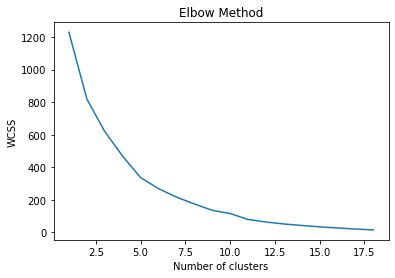

15 [1230.0833333333333, 819.6965944272446, 619.9119047619049, 467.728947368421, 336.37023809523805, 268.5428571428572, 216.37619047619052, 174.4230769230769, 135.08333333333331, 115.47619047619048, 78.58333333333333, 63.08333333333333, 50.91666666666666, 41.80714285714286, 33.30714285714285, 26.390476190476193, 19.890476190476193, 14.39047619047619]

Output
[ 2  2 12  2 12 12 14  8  8  1  1  1  1 12 12  2 12  2 12 13  4 13  5  5
 11  0  5  5  5 10  3  7  9  9  6  6]
[[ 5.00000000e+00  2.00000000e+00  0.00000000e+00  2.00000000e+00
   1.00000000e+00  4.00000000e+00  0.00000000e+00  0.00000000e+00
   6.00000000e+00  2.00000000e+00  4.00000000e+00  2.00000000e+00
   1.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   2.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  1.00000000e+00  3.25000000e+00
   0.00000000e+00  1.00000000e+00  2.50000000e-01  1.00000000e+00
   1.75000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+0

/home/peter/anaconda3/envs/rdkit/lib/python3.7/site-packages/numpy/core/_asarray.py:102: FutureWarning:

The input object of type 'PngImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PngImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.




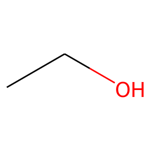
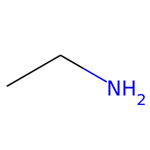
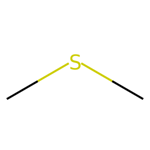
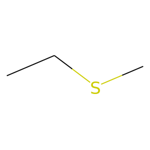
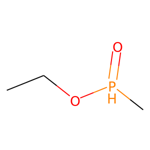


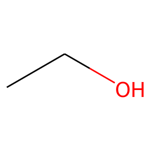
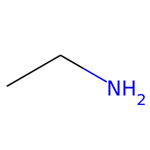
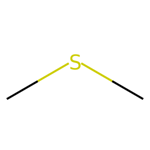
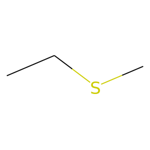
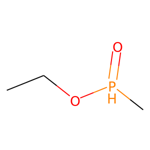

12 [13, 15, 16, 24, 34, 36, 38]



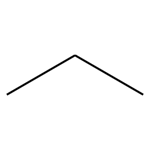
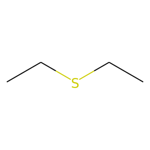
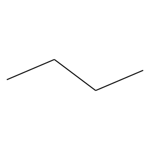
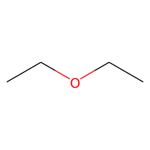
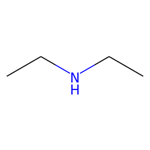
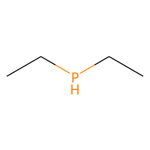
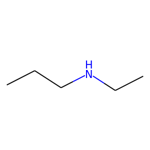


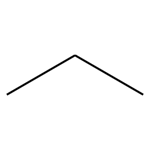
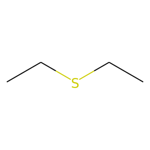
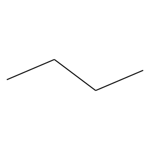
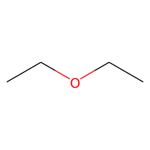
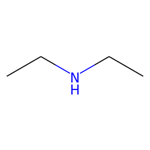
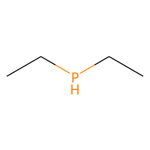
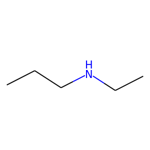

14 [17]



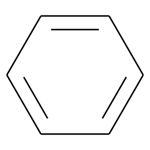


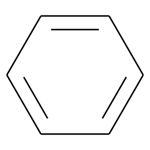

8 [18, 19]



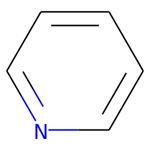
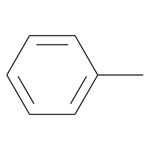


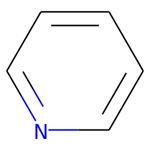
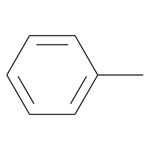

1 [20, 21, 22, 23]



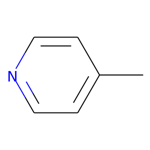
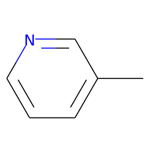
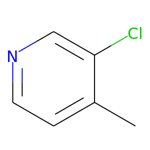
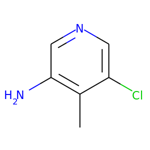


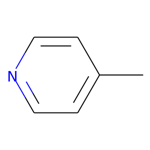
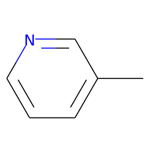
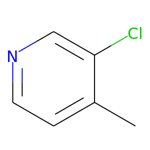
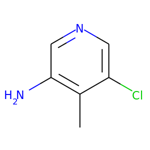

13 [41, 39]



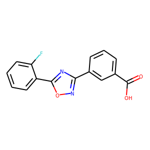
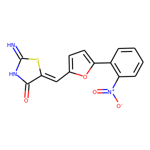


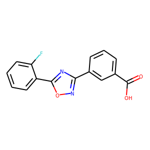
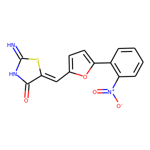

4 [40]



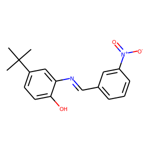


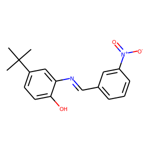

5 [44, 46, 42, 45, 43]



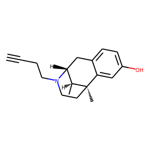
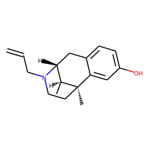
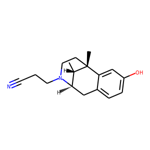
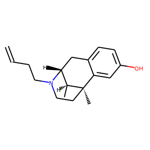
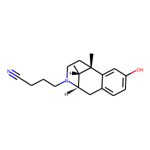


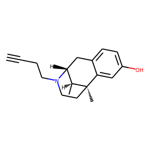
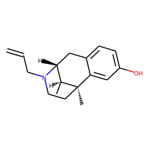
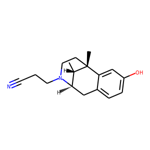
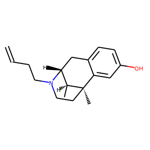
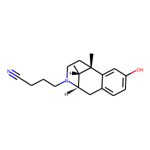

11 [48]



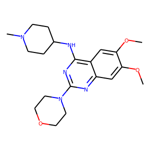


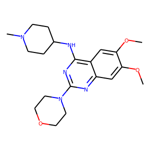

0 [47]



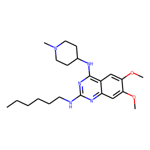


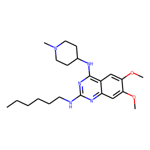

10 [49]



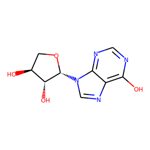


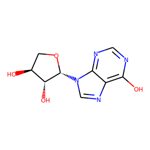

3 [50]



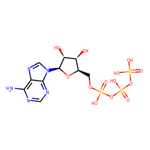


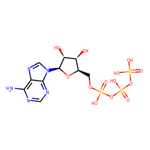

7 [51]



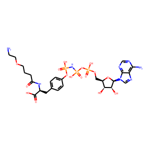


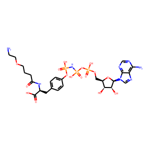

9 [56, 57]



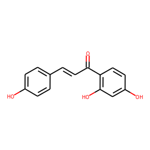
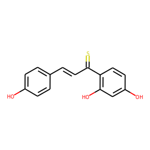


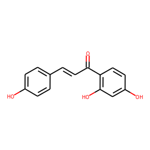
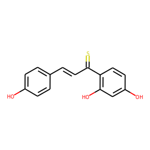

6 [58, 59]



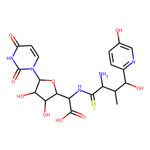
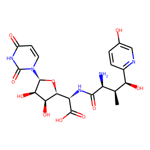


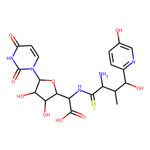
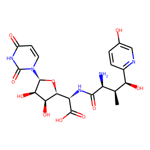

In [117]:
import sys
sys.path.append('/mnt/raid1/Python_projects')
sys.path.append('/mnt/raid1/Python_projects/pkg_mod')

import numpy as np
import math
import psycopg2
import collections
import network2d as n2d
import time

import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets
#from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from rdkit import Chem, rdBase
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem import AllChem, Descriptors, DataStructs
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from rdkit.Chem.Scaffolds import rdScaffoldNetwork
#from datetime import datetime
#import glob
#import matplotlib as mpl
#from matplotlib import pyplot as plt
#from matplotlib import image as mpimg
import ipyplot
#import os
#import pyvis
#from pyvis.network import Network
#import inspect
#from collections import defaultdict

##### Function Definitions #####

import math

def dist(i,j):
    #print(i, j)
    li = len(i)
    lj = len(j)
    q = 0
    if li != lj:
        print('Unequal Length')
    else:
       #q = 0
        for k in range(0,li):
            a = math.sqrt((i[k]-j[k])**2)
            q = q + a
            # print(q, a) 
        return q

    
##### Start Main #####

network = 2

# Initiate Global Values
fp_index =[]


# open database connection
#db_nn = psycopg2.connect(host = "localhost", dbname="Chemistry", user="postgres", password="postgres")
db_nn = psycopg2.connect(host = "192.168.86.31", dbname="Chemistry", user="postgres", password="postgres")

# Retrieve Structures from Database
cur = db_nn.cursor()
sql = 'SELECT COUNT(*) FROM public."Structures"'
cur.execute(sql)
mol_count = cur.fetchone()
mol_count = mol_count[0]
print('Structures Available : ',mol_count)

ms = int(pow(mol_count, 1/3)+1)
msize = pow(ms,2)
print('Matrix Size : ',ms,' - ',msize)
#msize = mol_count

# Retrieve Network from Database
#db_nn = psycopg2.connect(host = "localhost", dbname="Chemistry", user="postgres", password="postgres")
cur = db_nn.cursor()
sql = 'SELECT * FROM network."Neurons_2D" WHERE "Network" = '+str(network)
cur.execute(sql)
fl = cur.fetchall()
if len(fl) != 0:
    print('Network Found')
    msn = 0
    for i in fl:
        msn = max(msn, int(i[0]))
        msn = msn+1
        fpn = int(len(fl)/pow(msn,2))
    for i in range(0,fpn):
        j = fl[i][5]
        #print(j)
        fp_index.append(j)
    print('Network Size : ',msn,' - ',pow(msn,2))
    print('Network Fingerprint : ', fpn,' - ', fp_index)
else:
    print('Naive Network')
    
for i in fl:
    #print(i, i[5])
    if i[5] not in fp_index:
        fp_index.append(i[5])
        
print('Network FP_index :',fp_index)

# get Morgan Fingerprints from database
cur = db_nn.cursor()
#sql = 'SELECT "Fingerprint_ID", "FP_Shannon" FROM public."Fingerprints" WHERE "FP_Type" = 1 ORDER BY "Fingerprint_ID"'
sql = 'SELECT "Fingerprint_ID", "FP_Shannon" FROM public."Fingerprints" \
WHERE "FP_Type" = 1 ORDER BY "FP_Shannon" DESC LIMIT '+str(msize)
cur.execute(sql)
fp_list = cur.fetchall()

fp = len(fp_list) # set depth of Mapping Matrix
print('Fingerprints : ',fp)
print(fp_list)

# update FingerPrint_Index
for i in fp_list:
    if i[0] not in fp_index:
        fp_index.append(i[0])
        
fp = len(fp_index)

print('Fingerprint Index: ',fp_index)
# print(fp_index.index(5))
# print(fp_index.index(10))

fpa = ''
for i in fp_index:
    #fpa.append(i[0])
    fpa = fpa + str(i) +','
fpa = fpa[:-1]
    
print('Fingerprints chosen : ',fpa)

cur = db_nn.cursor()
#sql = 'SELECT "Fingerprint_ID", "FP_Shannon" FROM public."Fingerprints" WHERE "FP_Type" = 1 ORDER BY "Fingerprint_ID"'
sql = 'SELECT "Fingerprint_ID", "FP_Shannon" FROM public."Fingerprints" \
WHERE "FP_Type" = 1 AND "Fingerprint_ID" in ('+ fpa +') ORDER BY "FP_Shannon" DESC'
cur.execute(sql)
fp_list = cur.fetchall()

print('Final FP List : ', fp_list)

cur = db_nn.cursor()
#sql = 'SELECT sf.* FROM public."Structure_Fingerprint" sf \
#JOIN public."Fingerprints" fp ON sf."FP_ID" = fp."Fingerprint_ID" \
#WHERE fp."FP_Type" = 1'
sql = 'SELECT sf.* FROM public."Structure_Fingerprint" sf \
WHERE sf."FP_ID" in ('+ fpa +')'

cur.execute(sql)
mol_list = cur.fetchall()
# print(mol_list)

mol_fp = collections.defaultdict(list)
mol_net = {}
net_mol = collections.defaultdict(list)

for i in mol_list:
    a = [i[1], i[2]]
    # print(i, i[0], a)
    mol_fp[i[0]].append(a)
    
# print(mol_fp)
print("Molecules : ", len(mol_fp))
l_rate = 1/len(mol_fp)
print('Rate : ',l_rate, 1-l_rate)
    
# promol = [0] * fp
# print(promol)



#ms = 5
#ma = int((ms-1)/2)
#print(ms, ma)
# fp = 4


##### Generate Fingerprint Probes #####

fp_probes = {}
for i,j in mol_fp.items():
    #print()
    #print(i,j)
    pr = [0] * fp
    #fp_probes[i] = []
    for k in j:
        a = fp_index.index(k[0])
        pr[a] = k[1]
        
    print('Fingerprint probe : ',i, pr)
    fp_probes[i] = pr
    
#print(fp_probes)
fp_max = np.zeros(fp)
#print(fp_max)
for i,j in fp_probes.items():
    #print('Probe : ',j)
    l = len(j)
    for k in range(0,l):
        fp_max[k] = max(fp_max[k],j[k])
    #print('Pro_m : ',fp_max)
print('FP Max Probe : ',fp_max)

##### Create Structure Display Dictionary #####

cur = db_nn.cursor()
sql = 'SELECT "Structure_ID", "SMILES" FROM public."Structures"'
cur.execute(sql)
struct_list = cur.fetchall()
# print(struct_list)
struct_dict = {}
for i in struct_list:
    struct_dict[i[0]] = i[1]

print(struct_dict)

##### Prepare Clustering Set #####

x = []
cmpd_id = []
#sx = []
#sxmin = len(fp_probes)
#sxmax = 0

for k,v in fp_probes.items():
    #print(k,v)
    x.append(v)
    cmpd_id.append(k)

##### Calculate Cluster Cutoff #####

wcss = []

a = int(mol_count/2)+1

for i in range(1, a):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    if kmeans.inertia_ > mol_count:
        cut_off = i

cut_off = cut_off +1        
        
plt.plot(range(1, a), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

print(cut_off, wcss)

##### Calculate Initial Clustering #####

kmeans = KMeans(n_clusters=cut_off, init='k-means++', max_iter=300, n_init=10, random_state=0)
#kmeans = KMeans(n_clusters= 9, init=q, max_iter=300, n_init=1, random_state=0)
pred_y = kmeans.fit_predict(x)

print()
print('Output')
print(pred_y)
print(kmeans.cluster_centers_)
print(kmeans.n_iter_)
print(kmeans.labels_)

print(struct_dict)
print(net_mol)

k_mol = collections.defaultdict(list)

j = 0
for i in pred_y:
    print(i, j, cmpd_id[j])
    k_mol[i].append(cmpd_id[j])
    j = j+1
    
print(k_mol)

print()
print('Net Elements : ')
for i,j in k_mol.items():
    print(i,j)
    gmol = []
    if len(j) != 0:
        for k in j:
            #print(struct_dict[k])
            s = struct_dict[k]
            m = Chem.MolFromSmiles(s)
            #print(m)
            mw = Chem.Descriptors.MolWt(m)
            # print(mw)
            #print('Image in', s)
            # md = Draw.MolToImage(m)
            gmol.append(Draw.MolToImage(m))
            #print('Image out')
            # Draw.MolsToGridImage(gmol, molsPerRow=1)
        ipyplot.plot_images(gmol, max_images = 30, img_width = 150)


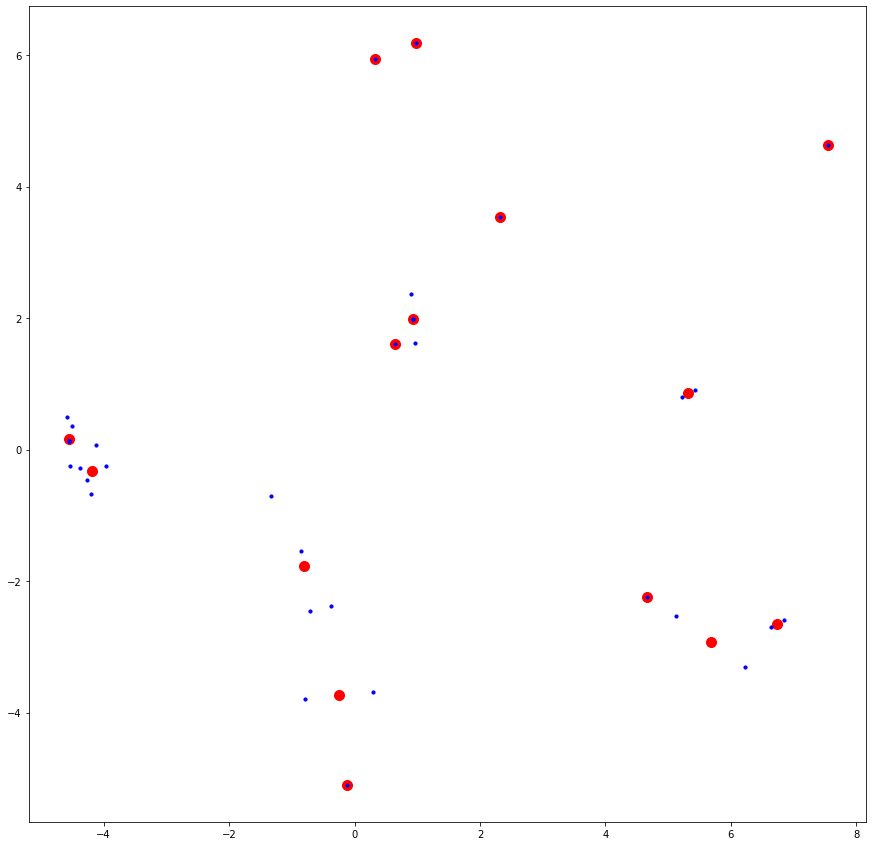

In [118]:
##### Calculate Initial PCA #####

from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pca.fit(x)
kmc = kmeans.cluster_centers_
kpca = pca.transform(kmc)
spca = pca.transform(x)

#print(pca.n_components_, pca.n_features_)
#print(pca.explained_variance_)
#print(pca.components_)

#kpcadf = pd.DataFrame(data = kpca
#             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

#print(kpca)
figdim = 15
plt.figure(figsize=(figdim,figdim))
plt.scatter(kpca[:,0], kpca[:,1], c= 'r', s = 100)
plt.scatter(spca[:,0], spca[:,1], c= 'b', s = 10)

In [12]:
print()

In [120]:
import plotly.graph_objects as go
import numpy as np

#print(struct_dict)
smol = []
ssmi = []
sind = []
stxt = []
for k,s in struct_dict.items():
    #print(struct_dict[k])
    #print(s)
    #s = struct_dict[k]
    m = Chem.MolFromSmiles(s)
            #print(m)
            #mw = Chem.Descriptors.MolWt(m)
            # print(mw)
            #print('Image in', s)
            # md = Draw.MolToImage(m)
    smol.append(Draw.MolToImage(m))
    ssmi.append(s)
    sind.append(k)
    t = str(k)+' - '+s
    stxt.append(t)
    #ssmi[k] = s
            #print('Image out')
            # Draw.MolsToGridImage(gmol, molsPerRow=1)
#ipyplot.plot_images(smol, max_images = 30, img_width = 150)

#print(ssmi, sind)



# Plot 3D ChemSpace
xs = spca[:,0]
ys = spca[:,1]
zs = spca[:,2]

spcadf = pd.DataFrame(data = spca
             , columns = ['x', 'y', 'z'])
spcadf['ID'] = sind
spcadf['text'] = stxt

#print(spcadf)


fig = go.Figure(data=[go.Scatter3d(
    x=spcadf['x'],
    y=spcadf['y'],
    z=spcadf['z'],
    hoverinfo = 'text',
    hovertext = (spcadf['text']),
    mode='markers',
    marker=dict(
        size=12,
        color=pred_y,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8 
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()



In [123]:
from ipywidgets import Image as widimg
from PIL import Image
import io

def image_to_byte_array(image:Image):
    imgByteArr = io.BytesIO()
    image.save(imgByteArr, format=image.format)
    imgByteArr = imgByteArr.getvalue()
    return imgByteArr



#img = Image.open(fh, mode='r')
#roi_img = img.crop(box)

#img_byte_arr = io.BytesIO()
#roi_img.save(img_byte_arr, format='PNG')
#img_byte_arr = img_byte_arr.getvalue()

#print(struct_dict)
molpic = {}
for i, j in struct_dict.items():
    #print(i,j)
    m = Chem.MolFromSmiles(j)
    #print(m)
    mw = Chem.Descriptors.MolWt(m)
    #print(mw)
    md = Draw.MolToImage(m)
    #print(type(md), md)
    b = image_to_byte_array(md)
    #print(type(b), b)
    molpic[i] = b
    widimg(value = molpic[i])
    



#widimg(value = molpic[48])

from ipywidgets import interactive
from ipywidgets import HTML
mol_details = HTML()
mol_details

from ipywidgets import Layout
image_widget = widimg(
    value=molpic[48],
    layout=Layout(height='300px', width='300px')
)


def hover_fn(trace, points, state):
    ind = points.point_inds[0]
    # Update details HTML widget
    mol_details.value = spcadf.iloc[ind].to_frame().to_html()
    #details.value = spcadf['text'].iloc[ind].to_frame().to_html()    
    # Update image widget
    pind = int(spcadf['ID'][ind])
    image_widget.value = molpic[pind]
    print(ind, type(ind), pind, type(pind), mol_details)

fig.layout.hovermode = 'closest'
scatter = fig.data[0]
scatter.text = spcadf['ID']
scatter.hoverinfo = 'text'
scatter.on_hover(hover_fn)
#print(scatter)

fig = go.FigureWidget(data=[dict(type = 'scattergl',
    x=spcadf['x'],
    y=spcadf['y'],
    #z=spcadf['z'],
    hoverinfo = 'text',
    hovertext = (spcadf['ID']),
    mode='markers',
    marker=dict(
        size=12,
        color=pred_y,                # set color to an array/list of desired values
        colorscale= 'rainbow', #'Viridis',   # choose a colorscale
        opacity=0.8 
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
#fig.show()

from ipywidgets import HBox, VBox
fig.layout.hovermode = 'closest'

VBox([fig, HBox([image_widget, mol_details])])
      #opacity_slider,
      #HBox([image_widget, details])])

    'data': [{'hoverinfo': 'text',
              'hovertext': [10, 11, 13, 14, 1…

In [122]:
from ipywidgets import HBox, VBox
fig.layout.hovermode = 'closest'

VBox([fig, HBox([image_widget, mol_details])])
      #opacity_slider,
      #HBox([image_widget, details])])

    'data': [{'hoverinfo': 'text',
              'hovertext': [10, 11, 13, 14, 1…

30 <class 'int'> 50 <class 'int'> HTML(value='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>30</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>x</th>\n      <td>2.325883</td>\n    </tr>\n    <tr>\n      <th>y</th>\n      <td>3.538544</td>\n    </tr>\n    <tr>\n      <th>z</th>\n      <td>-5.444598</td>\n    </tr>\n    <tr>\n      <th>ID</th>\n      <td>50</td>\n    </tr>\n    <tr>\n      <th>text</th>\n      <td>50 - C1=NC(=C2C(=N1)N(C=N2)[C@H]3[C@@H]([C@@H]([C@H](O3)COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O)O)N</td>\n    </tr>\n  </tbody>\n</table>')
28 <class 'int'> 48 <class 'int'> HTML(value='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>28</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>x</th>\n      <td>0.905837</td>\n    </tr>\n    <tr>\n      <th>y</th>\n      <td>2.360748</td>\n    </tr>\n    <tr>\n      <th>z</th>\n      <td>1.649

35 <class 'int'> 59 <class 'int'> HTML(value='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>35</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>x</th>\n      <td>5.421767</td>\n    </tr>\n    <tr>\n      <th>y</th>\n      <td>0.911566</td>\n    </tr>\n    <tr>\n      <th>z</th>\n      <td>-3.510701</td>\n    </tr>\n    <tr>\n      <th>ID</th>\n      <td>59</td>\n    </tr>\n    <tr>\n      <th>text</th>\n      <td>59 - C[C@H]([C@@H](C1=NC=C(C=C1)O)O)[C@@H](C(=O)N[C@@H]([C@@H]2[C@H]([C@H]([C@@H](O2)N3C=CC(=O)NC3=O)O)O)C(=O)O)N</td>\n    </tr>\n  </tbody>\n</table>')
35 <class 'int'> 59 <class 'int'> HTML(value='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>35</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>x</th>\n      <td>5.421767</td>\n    </tr>\n    <tr>\n      <th>y</th>\n      <td>0.911566</td>\n    </tr>\n    <tr>\n      <th>z

11 <class 'int'> 22 <class 'int'> HTML(value='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>11</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>x</th>\n      <td>-0.849129</td>\n    </tr>\n    <tr>\n      <th>y</th>\n      <td>-1.538866</td>\n    </tr>\n    <tr>\n      <th>z</th>\n      <td>0.365352</td>\n    </tr>\n    <tr>\n      <th>ID</th>\n      <td>22</td>\n    </tr>\n    <tr>\n      <th>text</th>\n      <td>22 - Cc1ccncc1Cl</td>\n    </tr>\n  </tbody>\n</table>')
10 <class 'int'> 21 <class 'int'> HTML(value='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>10</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>x</th>\n      <td>-0.704329</td>\n    </tr>\n    <tr>\n      <th>y</th>\n      <td>-2.459039</td>\n    </tr>\n    <tr>\n      <th>z</th>\n      <td>0.292821</td>\n    </tr>\n    <tr>\n      <th>ID</th>\n      <td>21</td>\n   

3 <class 'int'> 14 <class 'int'> HTML(value='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>3</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>x</th>\n      <td>-4.20798</td>\n    </tr>\n    <tr>\n      <th>y</th>\n      <td>-0.67805</td>\n    </tr>\n    <tr>\n      <th>z</th>\n      <td>-0.356927</td>\n    </tr>\n    <tr>\n      <th>ID</th>\n      <td>14</td>\n    </tr>\n    <tr>\n      <th>text</th>\n      <td>14 - CSC</td>\n    </tr>\n  </tbody>\n</table>')
1 <class 'int'> 11 <class 'int'> HTML(value='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>1</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>x</th>\n      <td>-4.268174</td>\n    </tr>\n    <tr>\n      <th>y</th>\n      <td>-0.470259</td>\n    </tr>\n    <tr>\n      <th>z</th>\n      <td>-0.757607</td>\n    </tr>\n    <tr>\n      <th>ID</th>\n      <td>11</td>\n    </tr>\n    

19 <class 'int'> 39 <class 'int'> HTML(value='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>19</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>x</th>\n      <td>6.231776</td>\n    </tr>\n    <tr>\n      <th>y</th>\n      <td>-3.311345</td>\n    </tr>\n    <tr>\n      <th>z</th>\n      <td>1.650674</td>\n    </tr>\n    <tr>\n      <th>ID</th>\n      <td>39</td>\n    </tr>\n    <tr>\n      <th>text</th>\n      <td>39 - O=C1NC(S/C1=C\\C2=CC=C(C3=C([N+]([O-])=O)C=CC=C3)O2)=N</td>\n    </tr>\n  </tbody>\n</table>')
32 <class 'int'> 56 <class 'int'> HTML(value='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>32</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>x</th>\n      <td>6.842937</td>\n    </tr>\n    <tr>\n      <th>y</th>\n      <td>-2.590599</td>\n    </tr>\n    <tr>\n      <th>z</th>\n      <td>0.445969</td>\n    </tr>\n    <tr>\n